In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
drive.mount("/content/drive", force_remount=True)

###1. FIND-S algorithm

In [3]:
import pandas as pd
import numpy as np

file_path = '/content/drive/MyDrive/STUDY2/ML LAB/DATASETS/EnjoySport.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)
df_positive=df[df['EnjoySport']=='Yes']
df_positive=df_positive[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']].reset_index()
df_positive

hyp=df_positive.loc[0]
print(hyp)

for i, row in df_positive.iterrows():
    for x in hyp.index[1:]:
        if hyp[x] != row[x]:
            hyp[x] = '?'

arr=np.array(hyp[1:])
print(arr,"\n\n")

index            0
Sky          Sunny
AirTemp       Warm
Humidity    Normal
Wind        Strong
Water         Warm
Forecast      Same
Name: 0, dtype: object
['Sunny' 'Warm' '?' 'Strong' '?' '?'] 




<ipython-input-3-2df672a70dfc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp[x] = '?'


###2. Candidate-Elimination algorithm

In [4]:
import numpy as np
import pandas as pd
import csv

with open("/content/drive/MyDrive/STUDY2/ML LAB/DATASETS/EnjoySport.csv") as f:
    csv_file=csv.reader(f)
    data=list(csv_file)

    s=data[1][:-1]
    g=[['?' for i in range(len(s))] for j in range(len(s))]

    for i in data:
        if i[-1]=="Yes":
            for j in range(len(s)):
                if i[j]!=s[j]:
                    s[j]='?'
                    g[j][j]='?'

        elif i[-1]=="No":
            for j in range(len(s)):
                if i[j]!=s[j]:
                    g[j][j]=s[j]
                else:
                    g[j][j]="?"
        print("\nSteps of Candidate Elimination Algorithm",data.index(i)+1)
        print(s)
        print(g)

    gh=[]
    for i in g:
        for j in i:
            if j!='?':
                gh.append(i)
                break

    print("\nFinal specific hypothesis:\n",s)
    print("\nFinal general hypothesis:\n",gh)


Steps of Candidate Elimination Algorithm 1
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 2
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 3
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 4
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
[['Sunny', '?', '?', '?', '?', '?'], ['

###3. naïve Bayesian classifier

In [5]:
import pandas as pd
file_path= '/content/drive/MyDrive/STUDY2/ML LAB/DATASETS/play_tennis.csv'
df = pd.read_csv(file_path)


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

X = df.drop('play', axis=1)
X = pd.get_dummies(X)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, df['play'], test_size=0.2, random_state=42)

naive_bayes_classifier = MultinomialNB().fit(X_train, y_train)


y_pred = naive_bayes_classifier.predict(X_test)
print("\nClassification is ",y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nResults:")
print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("Precision: ",precision)
print("\nConfusion Matrix:")
print(conf_matrix)

    day_D1  day_D10  day_D11  day_D12  day_D13  day_D14  day_D2  day_D3  \
0     True    False    False    False    False    False   False   False   
1    False    False    False    False    False    False    True   False   
2    False    False    False    False    False    False   False    True   
3    False    False    False    False    False    False   False   False   
4    False    False    False    False    False    False   False   False   
5    False    False    False    False    False    False   False   False   
6    False    False    False    False    False    False   False   False   
7    False    False    False    False    False    False   False   False   
8    False    False    False    False    False    False   False   False   
9    False     True    False    False    False    False   False   False   
10   False    False     True    False    False    False   False   False   
11   False    False    False     True    False    False   False   False   
12   False    False    Fa

###4. Text Classification - naïve Bayesian classifier model

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

file_path= '/content/drive/MyDrive/STUDY2/ML LAB/DATASETS/text_classification.csv'
df = pd.read_csv(file_path)

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['yes/no'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

nb_classifier = MultinomialNB().fit(X_train_vect, y_train)

y_pred = nb_classifier.predict(X_test_vect)

feature_names = vectorizer.get_feature_names_out()
print("Words or Tokens in the text document:")
print(feature_names,"\n")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['yes', 'no'])

print("Confusion Matrix:\n", conf_matrix,"\n")
print("Accuracy:", round(accuracy, 5),"\n")
print("Precision (Yes):", round(precision, 5),"\n")
print("Recall (Yes):", round(recall, 5))

Words or Tokens in the text document:
['about' 'am' 'an' 'and' 'awesome' 'bad' 'beers' 'best' 'boss' 'can'
 'dance' 'deal' 'donot' 'enemy' 'feel' 'fun' 'good' 'great' 'have'
 'holiday' 'horrible' 'house' 'is' 'juice' 'like' 'locality' 'love' 'my'
 'of' 'place' 'sick' 'stay' 'stuff' 'taste' 'that' 'the' 'these' 'this'
 'tired' 'to' 'today' 'tomorrow' 'very' 'view' 'we' 'went' 'what' 'will'
 'with' 'work'] 

Confusion Matrix:
 [[2 0]
 [0 2]] 

Accuracy: 1.0 

Precision (Yes): 1.0 

Recall (Yes): 1.0


###5. Bayesian Belief network

In [ ]:
!pip install pgmpy

In [9]:
import numpy as np
import pandas as pd
import csv

from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

heartDisease = pd.read_csv('/content/drive/MyDrive/STUDY2/ML LAB/DATASETS/heart.csv')
heartDisease = heartDisease.replace('?',np.nan)

print('Sample instances from the dataset are given below')
print(heartDisease.head())

print('\n Attributes and datatypes')
print(heartDisease.dtypes)
heartDisease.rename(columns={"target":"heartdisease"},inplace=True)

model =BayesianNetwork([('age', 'heartdisease'), ('sex', 'heartdisease'), ('exang', 'heartdisease'), ('cp', 'heartdisease'),
('heartdisease', 'restecg'), ('heartdisease', 'chol')])


print('\n Learning CPD using Maximum likelihood estimators')
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)

print('\n 1. Probability of Heart Disease given evidence-restecg :1')
q1=HeartDiseasetest_infer.query(variables=['heartdisease'], evidence={'restecg':1})
print(q1)

print('\n 2. Probability of Heart Disease given evidence= cp:2 ')
q2=HeartDiseasetest_infer.query(variables=['heartdisease'], evidence={'cp':2})
print(q2)

Sample instances from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

 Attributes and datatypes
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

 Learning

###6. Decision tree based ID3 algorithm

In [24]:
import pandas as pd
import numpy as np
import math

In [23]:
df = pd.read_csv('/content/drive/MyDrive/STUDY2/ML LAB/DATASETS/play_tennis_id3.csv')

In [25]:
def entropy(s):
    p = s.loc[s['play']=='Yes']
    n = s.loc[s['play']=='No']
    if (p.shape[0] == 0 or n.shape[0] == 0):
        return 0
    pRatio = p.shape[0]/s.shape[0]
    nRatio = n.shape[0]/s.shape[0]
    entropy = -pRatio * math.log2(pRatio) -nRatio * math.log2(nRatio)
    return entropy

def gain(s, a):
    gain = entropy(s)
    for value in s[a].unique():
        gain -= (s[s[a]==value].shape[0] / s.shape[0]) * entropy(s[s[a]==value])
    return gain

def id3(X, target, attrs):
    root = {}
    targetCounts = X[target].value_counts()

    if X[target].eq('Yes').all():
        return 'Yes'
    elif X[target].eq('No').all():
        return 'No'
    elif len(attrs) == 0:
        return 'Yes' if targetCounts['Yes'] > targetCounts['No'] else 'No'
    else:
        gains = [gain(X, a) for a in attrs]
        best = attrs[gains.index(max(gains))]
        root = {best: {}}
        attrs.remove(best)
        for v in X[best].unique():
            xv = X.loc[X[best]==v]
            if len(xv) == 0:
                root[best].update({v: 'P' if targetCounts['P'] > targetCounts['No'] else 'No'})
            root[best].update({v: id3(xv, target, attrs)})
    return root


##-----------------------------------------------------------------
tree = id3(df, 'play', list(df.columns[:-1]))


def visualize(root, indent=0):
    if type(root) == dict:
        for k, v in root.items():
            print(" "*indent + f"{k}:")
            visualize(v, indent+2)
    else:
        print(" "*indent + repr(root))

visualize(tree)

outlook:
  Sunny:
    humidity:
      High:
        'No'
      Normal:
        'Yes'
  Overcast:
    'Yes'
  Rain:
    wind:
      Weak:
        'Yes'
      Strong:
        'No'


###7. ANN with backpropogation

In [71]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/STUDY2/ML LAB/DATASETS/NN.csv')
y = df[['target']].to_numpy(dtype=float)
X = df[['x', 'y']].to_numpy(dtype=float)

#X = np.array([[2, 9], [1, 5], [3, 6]], dtype=float)
#y = np.array([[92], [86], [89]], dtype=float)

In [72]:
# Normalize data
X = X / np.amax(X, axis=0)
y = y / 100

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

# Variable initialization
epoch = 5
lr = 0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1

# Weight and bias initialization
wh = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
bh = np.random.uniform(size=(1, hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))

# Training
for i in range(epoch):
    # Forward Propagation
    hinp1 = np.dot(X, wh)
    hinp = hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1 = np.dot(hlayer_act, wout)
    outinp = outinp1 + bout
    output = sigmoid(outinp)

    # Backpropagation
    EO = y - output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)

    # How much hidden layer weights contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad

    # Update weights
    wout += hlayer_act.T.dot(d_output) * lr
    wh += X.T.dot(d_hiddenlayer) * lr

# Output
print("Weights:")
for i, w in enumerate(wh.T):
    print(i ,":", dict(zip(range(2), w)))

for j, w in enumerate(wout.T):
    print(j+2 ,":", dict(zip(range(2), w)))

for k, b in enumerate(bh[0]):
    print(k+4 ,":", b)

for l, b in enumerate(bout[0]):
    print(l+4 ,":", b)

# Test the model
for i in range(len(X)):
    test_input = X[i]
    expected_output = y[i][0]

    h_input = np.dot(test_input, wh) + bh
    h_output = sigmoid(h_input)
    final_input = np.dot(h_output, wout) + bout
    final_output = sigmoid(final_input)[0]

    print("\nNormalized Inputs:", test_input)
    print("Expected normalized output:", expected_output)
    print("After 5 epochs Output:", final_output)

Weights:
0 : {0: 0.7222297400548994, 1: 0.47692392422466073}
1 : {0: 0.014018865861864222, 1: 0.522156644653065}
2 : {0: 0.08182134627941348, 1: 0.770895676875111}
2 : {0: 0.14048769736949196, 1: 0.7000394116467773}
4 : 0.651375014278689
5 : 0.9439456729805844
6 : 0.7280253931663705
4 : 0.3694778130194013

Normalized Inputs: [0.66666667 1.        ]
Expected normalized output: 0.92
After 5 epochs Output: [0.8630241]

Normalized Inputs: [0.33333333 0.55555556]
Expected normalized output: 0.86
After 5 epochs Output: [0.85152485]

Normalized Inputs: [1.         0.66666667]
Expected normalized output: 0.89
After 5 epochs Output: [0.85685804]


###8. K-Means - EM algorithm

In [73]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing

iris = datasets.load_iris()

x = pd.DataFrame(iris.data)
x.columns = iris.feature_names
y = pd.DataFrame(iris.target)
y.columns = ['Target']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observation: The GMM using EM Algorithm based clustering matched the true labels more closely than the K-Means


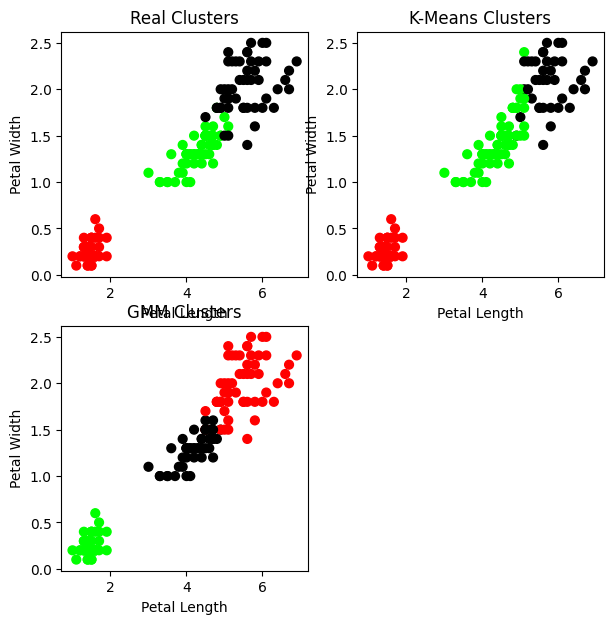

In [77]:
model = KMeans(n_clusters= 3)
model.fit(x)

plt.figure(figsize=(7,7))
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(2, 2, 1)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c = colormap[y.Target], s = 40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 2, 2)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c = colormap[model.labels_], s = 40)
plt.title('K-Means Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


scaler = preprocessing.StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa, columns = x.columns)

gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c = colormap[gmm_y], s = 40)
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation: The GMM using EM Algorithm based clustering matched the true labels more closely than the K-Means')

###9. k-Nearest Neighbor algorithm

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from collections import Counter

iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
k = 3

In [79]:
y_pred = np.array([], dtype=int)

for test in x_test:
    distances = np.array([])
    for train in x_train:
        v = np.sqrt(sum([(test[i]-train[i])**2 for i in range(train.shape[0])]))
        distances = np.append(distances, [v])
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    counter = Counter(nearest_labels)
    most_common_label = counter.most_common(1)[0][0]
    y_pred = np.append(y_pred, [most_common_label])

confusion_matrix = pd.DataFrame([[0, 0, 0],[0, 0, 0], [0, 0, 0]], columns=[0, 1, 2], index=[0, 1, 2])
correct = 0

for i in range(y_test.shape[0]):
    print(f"Sample: {x_test[i]}, Actual Label: {y_test[i]}, Predicted Label: {y_pred[i]}")
    if y_test[i] == y_pred[i]: correct += 1
    confusion_matrix.iloc[y_test[i], y_pred[i]] += 1

print(f"{correct} number of correct classifications out of {y_pred.shape[0]}")
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Sample: [4.9 2.5 4.5 1.7], Actual Label: 2, Predicted Label: 1
Sample: [5.6 3.  4.5 1.5], Actual Label: 1, Predicted Label: 1
Sample: [4.6 3.2 1.4 0.2], Actual Label: 0, Predicted Label: 0
Sample: [6.  2.9 4.5 1.5], Actual Label: 1, Predicted Label: 1
Sample: [6.4 2.8 5.6 2.1], Actual Label: 2, Predicted Label: 2
Sample: [5.2 4.1 1.5 0.1], Actual Label: 0, Predicted Label: 0
Sample: [5.6 2.8 4.9 2. ], Actual Label: 2, Predicted Label: 2
Sample: [5.1 3.8 1.9 0.4], Actual Label: 0, Predicted Label: 0
Sample: [6.9 3.1 5.4 2.1], Actual Label: 2, Predicted Label: 2
Sample: [6.4 2.7 5.3 1.9], Actual Label: 2, Predicted Label: 2
Sample: [5.1 3.5 1.4 0.2], Actual Label: 0, Predicted Label: 0
Sample: [5.6 2.9 3.6 1.3], Actual Label: 1, Predicted Label: 1
Sample: [6.2 3.4 5.4 2.3], Actual Label: 2, Predicted Label: 2
Sample: [6.3 3.3 6.  2.5], Actual Label: 2, Predicted Label: 2
Sample: [6.9 3.2 5.7 2.3], Actual Label: 2, Predicted Label: 2
14 number of correct classifications out of 15
   0  1 

###10. Locally Weighted Regression

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [81]:
def kernel(point, xmat, τ):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye((m)))

    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2 * τ**2))

    return weights

def localWeight(point, xmat, ymat, τ):
    wt = kernel(point, xmat, τ)
    W = (X.T * (wt * X)).I * (X.T * wt * ymat.T)
    return W

def localWeightRegression(xmat, ymat, τ):
    m, n = xmat.shape
    y_pred = np.zeros(m)

    for i in range(m):
        y_pred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, τ)

    return y_pred

(244, 2)


<ipython-input-81-188798acbdac>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(diff * diff.T / (-2 * τ**2))
<ipython-input-81-188798acbdac>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, τ)


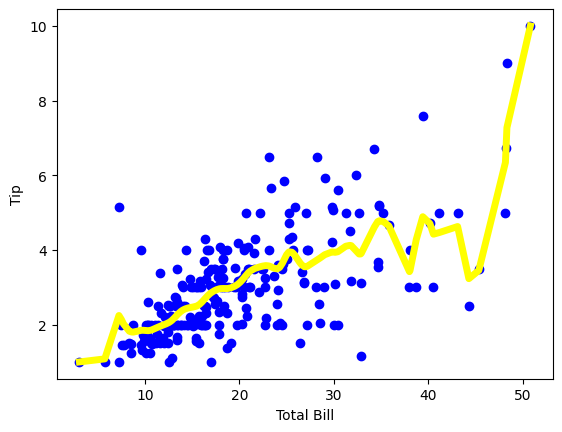

In [82]:
data = pd.read_csv('/content/drive/MyDrive/STUDY2/ML LAB/LABCYCLE/ALI/10-dataset.csv')

colA = np.array(data.total_bill)
colB = np.array(data.tip)

mColA, mColB = np.mat(colA), np.mat(colB)

m = mColB.shape[1]
one = np.ones((1, m), dtype = int)

X = np.hstack((one.T, mColA.T))
print(X.shape)

yPred = localWeightRegression(X, mColB, 0.8)

xsort = X.copy()
xsort.sort(axis = 0)

plt.scatter(colA, colB, color='blue')
plt.plot(xsort[:, 1], yPred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()